# Northern Ireland Weekly Deaths Exploration

Analysing weekly death registrations in Northern Ireland.

# Usage
Navigate to any section starting with *Configure:* and set the variables as needed for your notebook execution.

In [3]:
!which python
! python -m certifi
! tail /opt/conda/lib/python3.10/site-packages/certifi/cacert.pem
!chmod 777 /home/jovyan/kainos-chain.pem

/opt/conda/bin/python
/opt/conda/lib/python3.10/site-packages/certifi/cacert.pem
4X8jj/O/CyJUUlXin5xVtk/C3ejP2ndAL/BW/WUOPxPQTI3rR3W9DvFQcTYSo2Nd
avsWxEprOxAtgJzOq+NpopeBq50bSUgTGm5RVxeAgRNTd1iV7CyZ7sWSq7EtYo1J
2X7ccPk1tWF6V69TQH9lBWjM5cpy/MtuCAZy7qozDzl2jhQXQAUl7V9Jb+q6x3Lg
b6yIswgjhDZlN17b+ASV84oClXQcPF3P0lsS20nLNOD8GWoGgEXvkbqiKGjcVkID
8/E435A82xLM5sW23zhYrYGgGnjeHXqLTk/apBnT0xahn4rXUsh0j8EeLaZLLsn4
QxV3Mxsaaq32BfuagQTup6ae6q42ndAvJnduh6c9p5Mr72mC21F7ngjsxrancEyi
QLzOHhSdLUBd4Kazp/a4UYFmJ4XmdRKfgzj19J0RqoxriIR4wYU+91G4LH3P3kjm
gSUPs10=
-----END CERTIFICATE-----



In [1]:
!pip --cert=/home/jovyan/kainos-chain.pem --trusted-host pypi.org --trusted-host files.pythonhosted.org install  plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 12.7 MB/s eta 0:00:0000:0100:01
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)


# Setup

In [2]:
!unset REQUESTS_CA_BUNDLE
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org ipywidgets>=7.6
!pip install --cert=/home/jovyan/kainos-chain.pem --trusted-host pypi.org --trusted-host files.pythonhosted.org openpyxl
!pip install --cert=/home/jovyan/kainos-chain.pem --trusted-host pypi.org --trusted-host files.pythonhosted.org --trusted-host pypi.org --trusted-host files.pythonhosted.org xlrd
!pip install --cert=/home/jovyan/kainos-chain.pem pandas

In [17]:
!tail /home/jovyan/kainos-chain.pem

4X8jj/O/CyJUUlXin5xVtk/C3ejP2ndAL/BW/WUOPxPQTI3rR3W9DvFQcTYSo2Nd
avsWxEprOxAtgJzOq+NpopeBq50bSUgTGm5RVxeAgRNTd1iV7CyZ7sWSq7EtYo1J
2X7ccPk1tWF6V69TQH9lBWjM5cpy/MtuCAZy7qozDzl2jhQXQAUl7V9Jb+q6x3Lg
b6yIswgjhDZlN17b+ASV84oClXQcPF3P0lsS20nLNOD8GWoGgEXvkbqiKGjcVkID
8/E435A82xLM5sW23zhYrYGgGnjeHXqLTk/apBnT0xahn4rXUsh0j8EeLaZLLsn4
QxV3Mxsaaq32BfuagQTup6ae6q42ndAvJnduh6c9p5Mr72mC21F7ngjsxrancEyi
QLzOHhSdLUBd4Kazp/a4UYFmJ4XmdRKfgzj19J0RqoxriIR4wYU+91G4LH3P3kjm
gSUPs10=
-----END CERTIFICATE-----



In [14]:
!ls -artl /home/jovyan

total 35244
drwx------  3 jovyan users       96 Aug 25  2022  .local
drwx------  3 jovyan users       96 Aug 25  2022  .ipython
drwx------  3 jovyan users       96 Aug 26  2022  .yarn
drwx------  3 jovyan users       96 Aug 28  2022  .config
-rwx------  1 jovyan users      112 Sep 27  2022  .gitignore
drwx------  7 jovyan users      224 Sep 30  2022  .cache
-rwx------  1 jovyan users    44247 Mar 20  2023  ni-deaths-cause-source-excel-file-list.json
-rwx------  1 jovyan users  6094754 Mar 21  2023  NI-Deaths-Monthly.ipynb
-rw-r--r--  1 jovyan users   604244 Apr 15  2023  NI-PIP-Registrations.ipynb
-rwx------  1 jovyan users      893 Apr 16  2023  .bash_history
-rw-r--r--  1 jovyan users  1987659 Aug 27  2023  NI-Deaths-Weekly-June-2023.ipynb
-rwx------  1 jovyan users 12788478 Nov 26 15:42  NI-Deaths-Cause.ipynb
-rwx------  1 jovyan users   525046 Dec  1 21:04  NI-Births-Monthly.ipynb
-rw-r--r--  1 jovyan users  8445905 Dec 10 15:18  NI-Injections.ipynb
-rw-r--r--  1 jovyan users  4127

In [3]:
import certifi
certifi.where()

'/opt/conda/lib/python3.10/site-packages/certifi/cacert.pem'

In [5]:
! cat kainos-chain.pem >> /opt/conda/lib/python3.10/site-packages/certifi/cacert.pem

In [6]:
!tail /opt/conda/lib/python3.10/site-packages/certifi/cacert.pem

4X8jj/O/CyJUUlXin5xVtk/C3ejP2ndAL/BW/WUOPxPQTI3rR3W9DvFQcTYSo2Nd
avsWxEprOxAtgJzOq+NpopeBq50bSUgTGm5RVxeAgRNTd1iV7CyZ7sWSq7EtYo1J
2X7ccPk1tWF6V69TQH9lBWjM5cpy/MtuCAZy7qozDzl2jhQXQAUl7V9Jb+q6x3Lg
b6yIswgjhDZlN17b+ASV84oClXQcPF3P0lsS20nLNOD8GWoGgEXvkbqiKGjcVkID
8/E435A82xLM5sW23zhYrYGgGnjeHXqLTk/apBnT0xahn4rXUsh0j8EeLaZLLsn4
QxV3Mxsaaq32BfuagQTup6ae6q42ndAvJnduh6c9p5Mr72mC21F7ngjsxrancEyi
QLzOHhSdLUBd4Kazp/a4UYFmJ4XmdRKfgzj19J0RqoxriIR4wYU+91G4LH3P3kjm
gSUPs10=
-----END CERTIFICATE-----



In [4]:
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.offline as pyo
import plotly.io as pio

from lib.utility_functions import local_ca_certificate_file_path, \
mutate_safely, debug_this, Month, download_file, \
remove_timestamp, rename_columns, convert_dtypes_obj_to_strings, \
inner_join_with

init_notebook_mode(connected = True)
pio.renderers.default = 'iframe' # or iframe?


## Configure: Debugging
The global variable below can be used to enable or disable debug messages.

In [5]:
debug_enabled = True
preview_only_enabled = False

In [6]:
def debug(item):
    debug_this(debug_enabled, item, preview_only_enabled)

In [11]:
@mutate_safely
def add_week_ending_date(df, default_date):
    
    def calculate_week_ending_date(week_ending, default_date="2020-19-03"):
        if week_ending == '19 Mar 2020 to 20 Mar 2020':
            return default_date
        else:
            if len(week_ending) > 10:
                return remove_timestamp(week_ending)
            else:
                return week_ending
    
    df['Week Ending Date'] = df['Week_end_Date'].apply(lambda raw_week_ending_date: calculate_week_ending_date(raw_week_ending_date, default_date))
    return

@mutate_safely
def convert_column_to_string(df, colname):
    df[colname] = df[colname].astype(str)
    return

# Prepare Deaths Data

We require ten datasets for analysis.  The table below lists the datasets and their data sources.

ID | Dataset | Period | Source File  | Comment  |
| --- | --- | --- | --- | --- |
1| 2015 Weekly Deaths | Pre-pandemic | [Historical Weekly Deaths 2011-2021](https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Historical%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2021.xlsx) |  |
2| 2016 Weekly Deaths | Pre-pandemic | [Historical Weekly Deaths 2011-2021](https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Historical%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2021.xlsx) |  |
3| 2017 Weekly Deaths | Pre-pandemic | [Historical Weekly Deaths 2011-2021](https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Historical%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2021.xlsx)|  |
4| 2018 Weekly Deaths | Pre-pandemic | [Historical Weekly Deaths 2011-2021](https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Historical%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2021.xlsx) |  |
5| 2019 Weekly Deaths | Pre-pandemic | [Historical Weekly Deaths 2011-2021](https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Historical%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2021.xlsx) |  |
6| 2020 Weekly Deaths | Pandemic | [Historical Weekly Deaths 2011-2021](https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Historical%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2021.xlsx) |  |
7| 2021 Weekly Deaths | Post-pandemic | [Historical Weekly Deaths 2011-2021](https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Historical%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2021.xlsx) |  |
8| 2022 Weekly Deaths | Post-pandemic | [Weekly Deaths December 2022](https://www.nisra.gov.uk/system/files/statistics/Weekly_Deaths%20-%20w%20e%2030%20December%202022_0.xlsx) | Rows 99-150 |
9| 2023 Weekly Deaths | Post-pandemic | [Weekly Deaths December 2023](https://www.nisra.gov.uk/system/files/statistics/Weekly_Deaths%20-%20w%20e%2029%20December%202023_0.xlsx) | New source file released weekly |
|  |  |  |
10| 2024 Weekly Deaths | Post-pandemic | [Weekly Deaths April 2024](https://www.nisra.gov.uk/system/files/statistics/Weekly_Deaths%20-%20w%20e%2026%20April%202024.xlsx) | New source file released weekly |
|  |  |  |

## 2024 Weekly Deaths

In [13]:
analysis_end_week = 17

In [14]:
nisra_weekly_deaths_2024_source_url="https://www.nisra.gov.uk/system/files/statistics/Weekly_Deaths%20-%20w%20e%2026%20April%202024.xlsx"
raw_nisra_weekly_deaths_2024_dest_filepath=f"data/inbound/raw/nisra/deaths/weekly/weekly_deaths_upto_including_{analysis_end_week}_2024.xlsx"
rows_to_read = analysis_end_week # Two rows fewer than the row number of the last data point.

In [15]:
download_file(nisra_weekly_deaths_2024_source_url, raw_nisra_weekly_deaths_2024_dest_filepath)

downloaded from: https://www.nisra.gov.uk/system/files/statistics/Weekly_Deaths%20-%20w%20e%2026%20April%202024.xlsx


In [16]:
df_2024 = pd.read_excel(raw_nisra_weekly_deaths_2024_dest_filepath,  
                                  sheet_name='Table 3', 
                                  skiprows=3, 
                                  nrows=rows_to_read,
                                  usecols='A:N')
debug(df_2024)

,Registration Week,Week Ending (Friday),Antrim & Newtownabbey,Ards & North Down,"Armagh City, Banbridge & Craigavon",Belfast,Causeway Coast & Glens,Derry City & Strabane,Fermanagh & Omagh,Lisburn & Castlereagh,Mid & East Antrim,Mid Ulster,"Newry, Mourne & Down",Total
0,1,2024-01-05,26,28,34,47,29,36,26,21,28,37,45,357
1,2,2024-01-12,23,50,47,81,35,48,28,30,37,43,40,462
2,3,2024-01-19,46,33,38,57,25,36,20,27,31,45,27,385
3,4,2024-01-26,25,44,48,73,24,23,26,28,30,25,23,369
4,5,2024-02-02,31,31,35,76,29,23,15,17,32,25,43,357
5,6,2024-02-09,45,40,58,70,35,30,23,25,33,22,28,409
6,7,2024-02-16,17,38,34,55,30,22,22,25,28,34,34,339
7,8,2024-02-23,32,52,45,56,37,27,26,22,25,22,46,390
8,9,2024-03-01,38,38,46,100,31,34,11,43,32,25,40,438
9,10,2024-03-08,21,44,48,71,23,37,23,44,28,24,38,401


In [17]:
year="2024"

df_2024_refined = df_2024\
.pipe(rename_columns, {"Registration Week":"Registration_Week", "Week Ending (Friday)":"Week_end_Date","Total":f"{year}"})\
.pipe(convert_dtypes_obj_to_strings)\
.pipe(convert_column_to_string, colname="Week_end_Date")\
.pipe(add_week_ending_date, default_date="2020-19-03")

debug(df_2024_refined)

,Registration_Week,Week_end_Date,Antrim & Newtownabbey,Ards & North Down,"Armagh City, Banbridge & Craigavon",Belfast,Causeway Coast & Glens,Derry City & Strabane,Fermanagh & Omagh,Lisburn & Castlereagh,Mid & East Antrim,Mid Ulster,"Newry, Mourne & Down",2024,Week Ending Date
0,1,2024-01-05,26,28,34,47,29,36,26,21,28,37,45,357,2024-01-05
1,2,2024-01-12,23,50,47,81,35,48,28,30,37,43,40,462,2024-01-12
2,3,2024-01-19,46,33,38,57,25,36,20,27,31,45,27,385,2024-01-19
3,4,2024-01-26,25,44,48,73,24,23,26,28,30,25,23,369,2024-01-26
4,5,2024-02-02,31,31,35,76,29,23,15,17,32,25,43,357,2024-02-02
5,6,2024-02-09,45,40,58,70,35,30,23,25,33,22,28,409,2024-02-09
6,7,2024-02-16,17,38,34,55,30,22,22,25,28,34,34,339,2024-02-16
7,8,2024-02-23,32,52,45,56,37,27,26,22,25,22,46,390,2024-02-23
8,9,2024-03-01,38,38,46,100,31,34,11,43,32,25,40,438,2024-03-01
9,10,2024-03-08,21,44,48,71,23,37,23,44,28,24,38,401,2024-03-08


## 2023 Weekly Deaths

In [7]:
analysis_end_week = 52

In [8]:
nisra_weekly_deaths_2023_source_url="https://www.nisra.gov.uk/system/files/statistics/Weekly_Deaths%20-%20w%20e%2029%20December%202023.xlsx"
raw_nisra_weekly_deaths_2023_dest_filepath=f"data/inbound/raw/nisra/deaths/weekly/weekly_deaths_upto_including_{analysis_end_week}_2023.xlsx"
rows_to_read = analysis_end_week # Two rows fewer than the row number of the last data point.

In [9]:
download_file(nisra_weekly_deaths_2023_source_url, raw_nisra_weekly_deaths_2023_dest_filepath)

downloaded from: https://www.nisra.gov.uk/system/files/statistics/Weekly_Deaths%20-%20w%20e%2029%20December%202023.xlsx


In [10]:
df_2023 = pd.read_excel(raw_nisra_weekly_deaths_2023_dest_filepath,  
                                  sheet_name='Table 3', 
                                  skiprows=3, 
                                  nrows=rows_to_read,
                                  usecols='A:N')
debug(df_2023)

,Registration Week,Week Ending (Friday),Antrim & Newtownabbey,Ards & North Down,"Armagh City, Banbridge & Craigavon",Belfast,Causeway Coast & Glens,Derry City & Strabane,Fermanagh & Omagh,Lisburn & Castlereagh,Mid & East Antrim,Mid Ulster,"Newry, Mourne & Down",Total
0,1,2023-01-06,31,43,43,89,39,38,48,31,31,34,47,474
1,2,2023-01-13,41,46,47,97,42,37,37,32,39,45,52,515
2,3,2023-01-20,38,43,36,83,35,32,24,31,29,17,41,409
3,4,2023-01-27,30,36,41,72,39,35,16,28,35,26,35,393
4,5,2023-02-03,24,37,31,77,29,35,20,31,28,17,39,368
5,6,2023-02-10,28,24,30,71,31,21,19,30,26,22,35,337
6,7,2023-02-17,30,36,47,77,30,40,28,22,24,24,44,402
7,8,2023-02-24,26,33,26,52,31,34,25,22,33,29,31,342
8,9,2023-03-03,23,41,35,53,29,16,22,29,21,25,25,319
9,10,2023-03-10,27,34,26,68,35,18,21,17,36,24,28,334


In [12]:
year="2023"

df_2023_refined = df_2023\
.pipe(rename_columns, {"Registration Week":"Registration_Week", "Week Ending (Friday)":"Week_end_Date","Total":f"{year}"})\
.pipe(convert_dtypes_obj_to_strings)\
.pipe(convert_column_to_string, colname="Week_end_Date")\
.pipe(add_week_ending_date, default_date="2020-19-03")

df_2023_refined

,Registration_Week,Week_end_Date,Antrim & Newtownabbey,Ards & North Down,"Armagh City, Banbridge & Craigavon",Belfast,Causeway Coast & Glens,Derry City & Strabane,Fermanagh & Omagh,Lisburn & Castlereagh,Mid & East Antrim,Mid Ulster,"Newry, Mourne & Down",2023,Week Ending Date
0,1,2023-01-06,31,43,43,89,39,38,48,31,31,34,47,474,2023-01-06
1,2,2023-01-13,41,46,47,97,42,37,37,32,39,45,52,515,2023-01-13
2,3,2023-01-20,38,43,36,83,35,32,24,31,29,17,41,409,2023-01-20
3,4,2023-01-27,30,36,41,72,39,35,16,28,35,26,35,393,2023-01-27
4,5,2023-02-03,24,37,31,77,29,35,20,31,28,17,39,368,2023-02-03
5,6,2023-02-10,28,24,30,71,31,21,19,30,26,22,35,337,2023-02-10
6,7,2023-02-17,30,36,47,77,30,40,28,22,24,24,44,402,2023-02-17
7,8,2023-02-24,26,33,26,52,31,34,25,22,33,29,31,342,2023-02-24
8,9,2023-03-03,23,41,35,53,29,16,22,29,21,25,25,319,2023-03-03
9,10,2023-03-10,27,34,26,68,35,18,21,17,36,24,28,334,2023-03-10


## 2022 Weekly Deaths

In [18]:
nisra_weekly_deaths_2020_2022_source_url='https://www.nisra.gov.uk/system/files/statistics/Weekly_Deaths%20-%20w%20e%2030%20December%202022_0.xlsx'
raw_nisra_weekly_deaths_2022_dest_filepath='data/inbound/raw/nisra/deaths/weekly/weekly_deaths_december_2022.xlsx'
rows_to_read = 146 # Four rows fewer than the row number of the last data point.

In [19]:
download_file(nisra_weekly_deaths_2020_2022_source_url, raw_nisra_weekly_deaths_2022_dest_filepath)

downloaded from: https://www.nisra.gov.uk/system/files/statistics/Weekly_Deaths%20-%20w%20e%2030%20December%202022_0.xlsx


In [20]:
df_2020_2022 = pd.read_excel(raw_nisra_weekly_deaths_2022_dest_filepath,  
                                  sheet_name='Table 3', 
                                  skiprows=3, 
                                  nrows=rows_to_read,
                                  usecols='A:N')

In [21]:
def extract_only_this_year(df, year):
    tmp_df = df[94:rows_to_read].reset_index(drop=True, inplace=False)
    assert len(tmp_df) == 52, "We must have a complete year of 52 registration weeks for 2022."
    return tmp_df

In [22]:
year="2022"

df_2022_refined = df_2020_2022\
.pipe(extract_only_this_year, year=year)\
.pipe(rename_columns, {"Registration Week":"Registration_Week", "Week Ending (Friday)":"Week_end_Date","Total":f"{year}"})\
.pipe(convert_dtypes_obj_to_strings)\
.pipe(convert_column_to_string, colname="Week_end_Date")\
.pipe(add_week_ending_date, default_date="2020-19-03")

debug(df_2022_refined)

,Registration_Week,Week_end_Date,Antrim & Newtownabbey,Ards & North Down,"Armagh City, Banbridge & Craigavon",Belfast,Causeway Coast & Glens,Derry City & Strabane,Fermanagh & Omagh,Lisburn & Castlereagh,Mid & East Antrim,Mid Ulster,"Newry, Mourne & Down",2022,Week Ending Date
0,1,2022-01-07 00:00:00,36,35,25,68,23,31,43,26,40,43,46,416,2022-01-07
1,2,2022-01-14 00:00:00,27,33,61,76,29,45,32,36,25,43,38,445,2022-01-14
2,3,2022-01-21 00:00:00,25,26,23,65,18,36,23,32,20,19,30,317,2022-01-21
3,4,2022-01-28 00:00:00,27,30,48,63,25,31,20,26,21,18,27,336,2022-01-28
4,5,2022-02-04 00:00:00,30,36,35,49,27,37,16,32,32,36,33,363,2022-02-04
5,6,2022-02-11 00:00:00,28,36,42,66,23,41,20,30,26,26,37,375,2022-02-11
6,7,2022-02-18 00:00:00,17,36,39,63,22,20,10,20,30,26,36,319,2022-02-18
7,8,2022-02-25 00:00:00,30,34,29,62,19,32,19,26,32,18,26,327,2022-02-25
8,9,2022-03-04 00:00:00,21,31,37,58,28,28,18,34,31,18,34,338,2022-03-04
9,10,2022-03-11 00:00:00,21,24,36,61,38,17,17,41,25,27,31,338,2022-03-11


## 2022 & 2023 Combined

In [24]:
from functools import reduce
df_2022_2023_refined = reduce(lambda left, right: pd.merge(left, right, on='Registration_Week', how='left'),
                                            [df_2022_refined, df_2023_refined, df_2024_refined]).convert_dtypes()\
                                            [['Registration_Week', '2022', '2023', '2024']]
debug(df_2022_2023_refined)

,Registration_Week,2022,2023,2024
0,1,416,474,357
1,2,445,515,462
2,3,317,409,385
3,4,336,393,369
4,5,363,368,357
5,6,375,337,409
6,7,319,402,339
7,8,327,342,390
8,9,338,319,438
9,10,338,334,401


### Configure: Current Year Data Coverage

You will always have incomplete data for the current calendar year as the death statistics are published weekly.

You must specify the registration week number (1:52) for which you have data to support inter-year analyses.


In [17]:
#df_weekly_deaths.to_pickle(f'data/outbound/deaths/weekly/PandemicPeriodWeeklyDeathsUpToWeek{analysis_end_week}.pkl')

## 2015 - 2021 Weekly Deaths

In [29]:
#https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Historical%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2022.xlsx
#https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Historical%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2021.xlsx
#raw_nisra_historical_weekly_deaths_source_url='https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Historical%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2022.xlsx'

raw_nisra_historical_weekly_deaths_source_url="https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2022%20-%20new%20with%20excess%20deaths.xlsx"
raw_nisra_historical_weekly_deaths_dest_filepath='data/inbound/raw/nisra/deaths/weekly/historical_weekly_deaths_may_2024_version.xlsx'

download_file(raw_nisra_historical_weekly_deaths_source_url, raw_nisra_historical_weekly_deaths_dest_filepath)

downloaded from: https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/Final%20Weekly%20Deaths%20by%20Age%20and%20Respiratory%20Deaths%202011-2022%20-%20new%20with%20excess%20deaths.xlsx


In [33]:
def extract_columns_of_interest(df):
    return df.iloc[0:, [0, 3]]

def convert_datatypes(df):
    return df.convert_dtypes()

# @mutate_safely
# def extract_and_cast_as_int(df, column):
#     df[column] = df[column].astype(str).str.replace("[a-zA-Z]", "", regex=True).astype(float).astype(int)
#     return


@mutate_safely
def extract_and_cast_as_int(df, column):
    df[column] = df[column].astype(str).str.replace("\[.*?[a-zA-Z].*?\]", "", regex=True).astype(float).astype(int)
    return



### Registration Weeks
For some years there are 53 registration weeks and for others there are 52.
Some registration weeks start in the December of the previous calendar year and other registration weeks end in the January of the subsequent calendar year.
We will endeavour to capture all registration weeks for all years.

In [36]:
year_registration_week_count = {
    2015: 53,
    2016: 52,
    2017: 52,
    2018: 52,
    2019: 52,
    2020: 53,
    2021: 52
}

In [37]:
dfs_2015_2021 = {}

for year, registration_weeks in year_registration_week_count.items():
    print(f'Processing {year} which has {registration_weeks} registration weeks...')
    
    df = pd.read_excel(raw_nisra_historical_weekly_deaths_dest_filepath,  
                                  sheet_name=f'Weekly Deaths_{year}', 
                                  skiprows=3, 
                                  nrows=registration_weeks,
                                  usecols='A:D')
    
    dfs_2015_2021[year] = df\
    .pipe(rename_columns, {"Registration Week":"Registration_Week", f"Total Number of Deaths Registered in Week ({year})":f"{year}"})\
    .pipe(extract_columns_of_interest)\
    .pipe(extract_and_cast_as_int, column="Registration_Week")
    
df_2015_2021_refined = reduce(lambda left, right: pd.merge(left, right, on='Registration_Week', how='left'), list(dfs_2015_2021.values())).pipe(convert_datatypes)

Processing 2015 which has 53 registration weeks...
Processing 2016 which has 52 registration weeks...
Processing 2017 which has 52 registration weeks...
Processing 2018 which has 52 registration weeks...
Processing 2019 which has 52 registration weeks...
Processing 2020 which has 53 registration weeks...
Processing 2021 which has 52 registration weeks...


In [38]:
df_2015_2023 = reduce(lambda left, right: pd.merge(left, right, on='Registration_Week', how='left'), [df_2015_2021_refined, df_2022_2023_refined])

debug(df_2015_2023)

,Registration_Week,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,319,424,415,447,365,353,568,416,474,357
1,2,374,348,434,481,370,394,443,445,515,462
2,3,383,372,397,470,332,410,474,317,409,385
3,4,397,355,387,426,335,347,437,336,393,369
4,5,374,314,371,432,296,323,462,363,368,357
5,6,347,310,336,351,319,332,382,375,337,409
6,7,328,217,337,364,342,306,352,319,402,339
7,8,317,422,351,366,337,297,351,327,342,390
8,9,401,298,352,314,310,347,319,338,319,438
9,10,345,309,357,387,342,312,339,338,334,401


## Rank the top 20 Weeks for Deaths since 2015

In [39]:
all_year_columns = ['2015','2016','2017','2018','2019','2020','2021','2022','2023', '2024']

In [40]:
def convert_year_value_columns_to_rows(df, columns):
    return pd.melt(df[columns], id_vars='Registration_Week', var_name='Year', value_name='Weekly_Deaths')

@mutate_safely
def add_year_and_week(df):
    df["Year_and_Week"] = df["Year"] + " Week " + df["Registration_Week"].astype(str)
    return

def order_by_most_lethal(df):
    return df.sort_values('Weekly_Deaths', ascending=False).reset_index(drop=True,inplace=False)

In [41]:
columns_of_interest = ['Registration_Week'] + all_year_columns

df_most_deaths = df_2015_2023\
.pipe(convert_year_value_columns_to_rows, columns_of_interest)\
.pipe(add_year_and_week)\
.pipe(order_by_most_lethal)

df_most_deaths

,Registration_Week,Year,Weekly_Deaths,Year_and_Week
0,1,2021,568,2021 Week 1
1,2,2023,515,2023 Week 2
2,2,2018,481,2018 Week 2
3,3,2021,474,2021 Week 3
4,1,2023,474,2023 Week 1
...,...,...,...,...
525,49,2024,<NA>,2024 Week 49
526,50,2024,<NA>,2024 Week 50
527,51,2024,<NA>,2024 Week 51
528,52,2024,<NA>,2024 Week 52


In [42]:
df_top_20_most_deaths = df_most_deaths.head(20)
debug(df_top_20_most_deaths)

,Registration_Week,Year,Weekly_Deaths,Year_and_Week
0,1,2021,568,2021 Week 1
1,2,2023,515,2023 Week 2
2,2,2018,481,2018 Week 2
3,3,2021,474,2021 Week 3
4,1,2023,474,2023 Week 1
5,17,2020,470,2020 Week 17
6,3,2018,470,2018 Week 3
7,2,2024,462,2024 Week 2
8,5,2021,462,2021 Week 5
9,1,2018,447,2018 Week 1


In [43]:
my_colors = ["indianred" if '2023' in item else 'lightpink' if '2022' in item else 'orchid' if '2021' in item else 'lightyellow' if '2020' in item else 'lightblue' for item in df_most_deaths['Year_and_Week']]

fig_layout = go.Layout(
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    title=dict(text="NI Top 20 Weeks of Weekly Deaths by Date of Registration 2015-2024 YTD"),
    xaxis=dict(title_text="Year and Week of Year", type='category'),
    yaxis=dict(title_text="Deaths"),
)

fig_deaths_trends_top20 = make_subplots(specs=[[{"secondary_y": False}]])

def get_color(year_and_week):
    return 'green'

fig_deaths_trends_top20.add_trace(
    go.Bar(
        x=df_top_20_most_deaths['Year_and_Week'], 
        y=df_top_20_most_deaths['Weekly_Deaths'],
        text=df_top_20_most_deaths['Weekly_Deaths'],
        name='Core',
        marker_color=my_colors),
    secondary_y=False)

fig_deaths_trends_final = go.Figure(data=fig_deaths_trends_top20.data, layout=fig_layout)
fig_deaths_trends_final.show()

In [44]:
colors = ['lightslategray',] * 20
colors[1] = 'red'
colors[3] = 'red'

fig_layout = go.Layout(
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    title=dict(text="NI Top 20 Weekly Deaths by Date of Registration 2015-2024 YTD"),
    xaxis=dict(title_text="Year and Week of Year", type='category'),
    yaxis=dict(title_text="Deaths"),
)

fig = go.Figure(data=[go.Bar(x=df_top_20_most_deaths['Year_and_Week'],y=df_top_20_most_deaths['Weekly_Deaths'], marker_color=colors)], layout=fig_layout)

fig.update_layout(title_text="NI Top 20 Weekly Deaths by Date of Registration 2015-2024 YTD")

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()

In [45]:
@mutate_safely
def rename_index_with_labels(df, labels):
    df.rename(index=labels, inplace=True)
    return

def subset_columns(df, columns):
    return df[columns]

def style_dataframe(df, axis=1):
    return df.style.background_gradient(axis=axis)

def generate_sequence_labels(prefix, label_range):
    return {i: f"{prefix} {i + 1}" for i in range(label_range)}

In [46]:
df_styled_2015_2023 = df_2015_2023\
.pipe(subset_columns, columns=all_year_columns)\
.pipe(rename_index_with_labels, labels=generate_sequence_labels("Week", 53))\
.pipe(style_dataframe, axis=1)

df_styled_2015_2023

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Week 1,319,424,415,447,365,353,568,416,474,357
Week 2,374,348,434,481,370,394,443,445,515,462
Week 3,383,372,397,470,332,410,474,317,409,385
Week 4,397,355,387,426,335,347,437,336,393,369
Week 5,374,314,371,432,296,323,462,363,368,357
Week 6,347,310,336,351,319,332,382,375,337,409
Week 7,328,217,337,364,342,306,352,319,402,339
Week 8,317,422,351,366,337,297,351,327,342,390
Week 9,401,298,352,314,310,347,319,338,319,438
Week 10,345,309,357,387,342,312,339,338,334,401


## Descriptive Statistics
We will calculate the mean and standard deviation for a range of periods. We will use this to plot a baseline against our raw figures for each of the years for which we have data.

In [47]:
year_ranges = {
    '2015_to_2019': ['2015', '2016', '2017', '2018', '2019'],
    '2016_to_2020': ['2016', '2017', '2018', '2019', '2020'],
    '2017_to_2021': ['2017', '2018', '2019', '2020', '2021'],
    '2018_to_2022': ['2018', '2019', '2020', '2021', '2022'],
    '2016_to_2019_and_2021': ['2016', '2017', '2018', '2019', '2021']
}

### Mean

In [48]:
def calculate_mean(series):
    return series.mean()

@mutate_safely
def calculate_mean_for_ranges(df, ranges):
    for key, years in ranges.items():
        df[f"{key}_Mean"] = df[years].apply(calculate_mean, axis=1)
    return

In [49]:
df_2015_2023_with_mean = df_2015_2023.pipe(calculate_mean_for_ranges, ranges=year_ranges)

debug(df_2015_2023_with_mean)

,Registration_Week,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2015_to_2019_Mean,2016_to_2020_Mean,2017_to_2021_Mean,2018_to_2022_Mean,2016_to_2019_and_2021_Mean
0,1,319,424,415,447,365,353,568,416,474,357,394.0,400.8,429.6,429.8,443.8
1,2,374,348,434,481,370,394,443,445,515,462,401.4,405.4,424.4,426.6,415.2
2,3,383,372,397,470,332,410,474,317,409,385,390.8,396.2,416.6,400.6,409.0
3,4,397,355,387,426,335,347,437,336,393,369,380.0,370.0,386.4,376.2,388.0
4,5,374,314,371,432,296,323,462,363,368,357,357.4,347.2,376.8,375.2,375.0
5,6,347,310,336,351,319,332,382,375,337,409,332.6,329.6,344.0,351.8,339.6
6,7,328,217,337,364,342,306,352,319,402,339,317.6,313.2,340.2,336.6,322.4
7,8,317,422,351,366,337,297,351,327,342,390,358.6,354.6,340.4,335.6,365.4
8,9,401,298,352,314,310,347,319,338,319,438,335.0,324.2,328.4,325.6,318.6
9,10,345,309,357,387,342,312,339,338,334,401,348.0,341.4,347.4,343.6,346.8


In [50]:
@mutate_safely
def replace_nas_in_this_row_with(df, row_index, value):
    df.iloc[row_index, 0:9] = df.iloc[row_index, 0:9].fillna(value)
    return

def replace_nas_in_this_row_with_mean(df, row_index):
    substitue_mean_value = round(df.iloc[row_index,:].mean())
    return replace_nas_in_this_row_with(df, row_index=row_index, value=substitue_mean_value)

def replace_nas_in_this_row_with_zero(df, row_index):
    return replace_nas_in_this_row_with(df, row_index=row_index, value=0)

In [51]:
def calculate_sd(series):
    return series.std()

@mutate_safely
def calculate_sd_for_ranges(df, ranges):
    for key, years in ranges.items():
        df[f"{key}_SD"] = df[years].apply(calculate_sd, axis=1)
    return

In [52]:
df_2015_2023_with_sd = df_2015_2023\
.pipe(replace_nas_in_this_row_with_zero, row_index=52)\
.pipe(calculate_sd_for_ranges, ranges=year_ranges)

debug(df_2015_2023_with_sd)

,Registration_Week,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2015_to_2019_SD,2016_to_2020_SD,2017_to_2021_SD,2018_to_2022_SD,2016_to_2019_and_2021_SD
0,1,319,424,415,447,365,353,568,416,474,357,51.516987,40.127297,86.184685,86.143485,75.608862
1,2,374,348,434,481,370,394,443,445,515,462,54.743036,52.941477,43.373955,44.252684,54.806022
2,3,383,372,397,470,332,410,474,317,409,385,50.454930,50.854695,58.590102,74.140407,62.024189
3,4,397,355,387,426,335,347,437,336,393,369,35.721142,36.755952,45.615787,50.849779,44.000000
4,5,374,314,371,432,296,323,462,363,368,357,54.035174,54.924494,70.290113,70.545730,72.104091
5,6,347,310,336,351,319,332,382,375,337,409,17.700282,15.820872,24.114311,27.012960,28.465769
6,7,328,217,337,364,342,306,352,319,402,339,57.778024,57.625515,21.730163,23.786551,59.818893
7,8,317,422,351,366,337,297,351,327,342,390,39.778135,45.588376,26.340084,26.111300,33.261088
8,9,401,298,352,314,310,347,319,338,319,438,42.071368,23.899791,19.603571,16.071714,20.218803
9,10,345,309,357,387,342,312,339,338,334,401,28.142495,32.546889,27.446311,27.097970,28.428859


In [53]:
inclusion_columns = ["Registration_Week", "2015_to_2019_SD", "2016_to_2020_SD", "2017_to_2021_SD", "2018_to_2022_SD", "2016_to_2019_and_2021_SD"]
df_2015_2023_complete = df_2015_2023_with_mean.pipe(inner_join_with, df_2015_2023_with_sd, inclusion_columns, "Registration_Week")

debug(df_2015_2023_complete)

,Registration_Week,2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2015_to_2019_Mean,2016_to_2020_Mean,2017_to_2021_Mean,2018_to_2022_Mean,2016_to_2019_and_2021_Mean,2015_to_2019_SD,2016_to_2020_SD,2017_to_2021_SD,2018_to_2022_SD,2016_to_2019_and_2021_SD
0,1,319,424,415,447,365,353,568,416,474,...,394.0,400.8,429.6,429.8,443.8,51.516987,40.127297,86.184685,86.143485,75.608862
1,2,374,348,434,481,370,394,443,445,515,...,401.4,405.4,424.4,426.6,415.2,54.743036,52.941477,43.373955,44.252684,54.806022
2,3,383,372,397,470,332,410,474,317,409,...,390.8,396.2,416.6,400.6,409.0,50.454930,50.854695,58.590102,74.140407,62.024189
3,4,397,355,387,426,335,347,437,336,393,...,380.0,370.0,386.4,376.2,388.0,35.721142,36.755952,45.615787,50.849779,44.000000
4,5,374,314,371,432,296,323,462,363,368,...,357.4,347.2,376.8,375.2,375.0,54.035174,54.924494,70.290113,70.545730,72.104091
5,6,347,310,336,351,319,332,382,375,337,...,332.6,329.6,344.0,351.8,339.6,17.700282,15.820872,24.114311,27.012960,28.465769
6,7,328,217,337,364,342,306,352,319,402,...,317.6,313.2,340.2,336.6,322.4,57.778024,57.625515,21.730163,23.786551,59.818893
7,8,317,422,351,366,337,297,351,327,342,...,358.6,354.6,340.4,335.6,365.4,39.778135,45.588376,26.340084,26.111300,33.261088
8,9,401,298,352,314,310,347,319,338,319,...,335.0,324.2,328.4,325.6,318.6,42.071368,23.899791,19.603571,16.071714,20.218803
9,10,345,309,357,387,342,312,339,338,334,...,348.0,341.4,347.4,343.6,346.8,28.142495,32.546889,27.446311,27.097970,28.428859


### Persist All Weekly Deaths

In [54]:
df_2015_2023_complete.to_pickle(f'data/outbound/deaths/weekly/AllDeathsUpTo2024Week{analysis_end_week}.pkl')
#all_weekly_deaths_df.to_csv(f'data/outbound/deaths/weekly/AllDeathsUpTo2023Week{analysis_end_week}.csv', index=False)

In [55]:
all_weekly_deaths_df = df_2015_2023_complete.copy()

In [56]:
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

fig_deaths_trends = make_subplots(specs=[[{"secondary_y": False}]])

years = ['2015_to_2019_Mean', '2020', '2021', '2022', '2023', '2024']

for year in years:
    fig_deaths_trends.add_trace(
        go.Scatter(x=all_weekly_deaths_df['Registration_Week'], 
                   y=all_weekly_deaths_df[year].loc[0:(analysis_end_week - 1)] if year == "2024" else all_weekly_deaths_df[year], 
                   name=f"{year} Weekly Deaths", 
                   line_color = "red" if year == "2015_to_2019_Mean" else None, 
                   line_dash = "dot" if year == "2015_to_2019_Mean" else None),
        secondary_y=False,
    )

layout = go.Layout(
    height=800,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    title=dict(text="NI Weekly Deaths 2020-2024 YTD by Date of Registration versus 2015-2019 5yr Mean"),
    xaxis=dict(title_text="Registration Week of Year", type='category', tickmode = 'linear', tick0 = 1, dtick = 1, tickangle=0), 
    yaxis=dict(title_text="Registered Deaths"),
)
fig_deaths_trends = go.Figure(data=fig_deaths_trends.data, layout=layout)
fig_deaths_trends.show()

    # annotations=[dict(
    #     x='8.1',
    #     y=324,
    #     xref="x",
    #     yref="y",
    #     text="Week Ending 3rd March 2023",
    #     showarrow=True,
    #     font=dict(family="Arial", size=11, color="#020202"),
    #     align="left",
    #     arrowhead=2,
    #     arrowsize=1,
    #     arrowwidth=2,
    #     arrowcolor="#636363",
    #     ax=70,
    #     ay=-250,
    #     bordercolor="#c7c7c7",
    #     borderwidth=2,
    #     borderpad=4,
    #     bgcolor="#ddd9d8 ",
    #     opacity=0.8
    #     )]

In [60]:
all_weekly_deaths_df= df_2015_2023_complete.copy() 
all_weekly_deaths_df_copy = df_2015_2023_complete.copy() 
debug(all_weekly_deaths_df_copy[["2024"]])

,2024
0,357
1,462
2,385
3,369
4,357
5,409
6,339
7,390
8,438
9,401


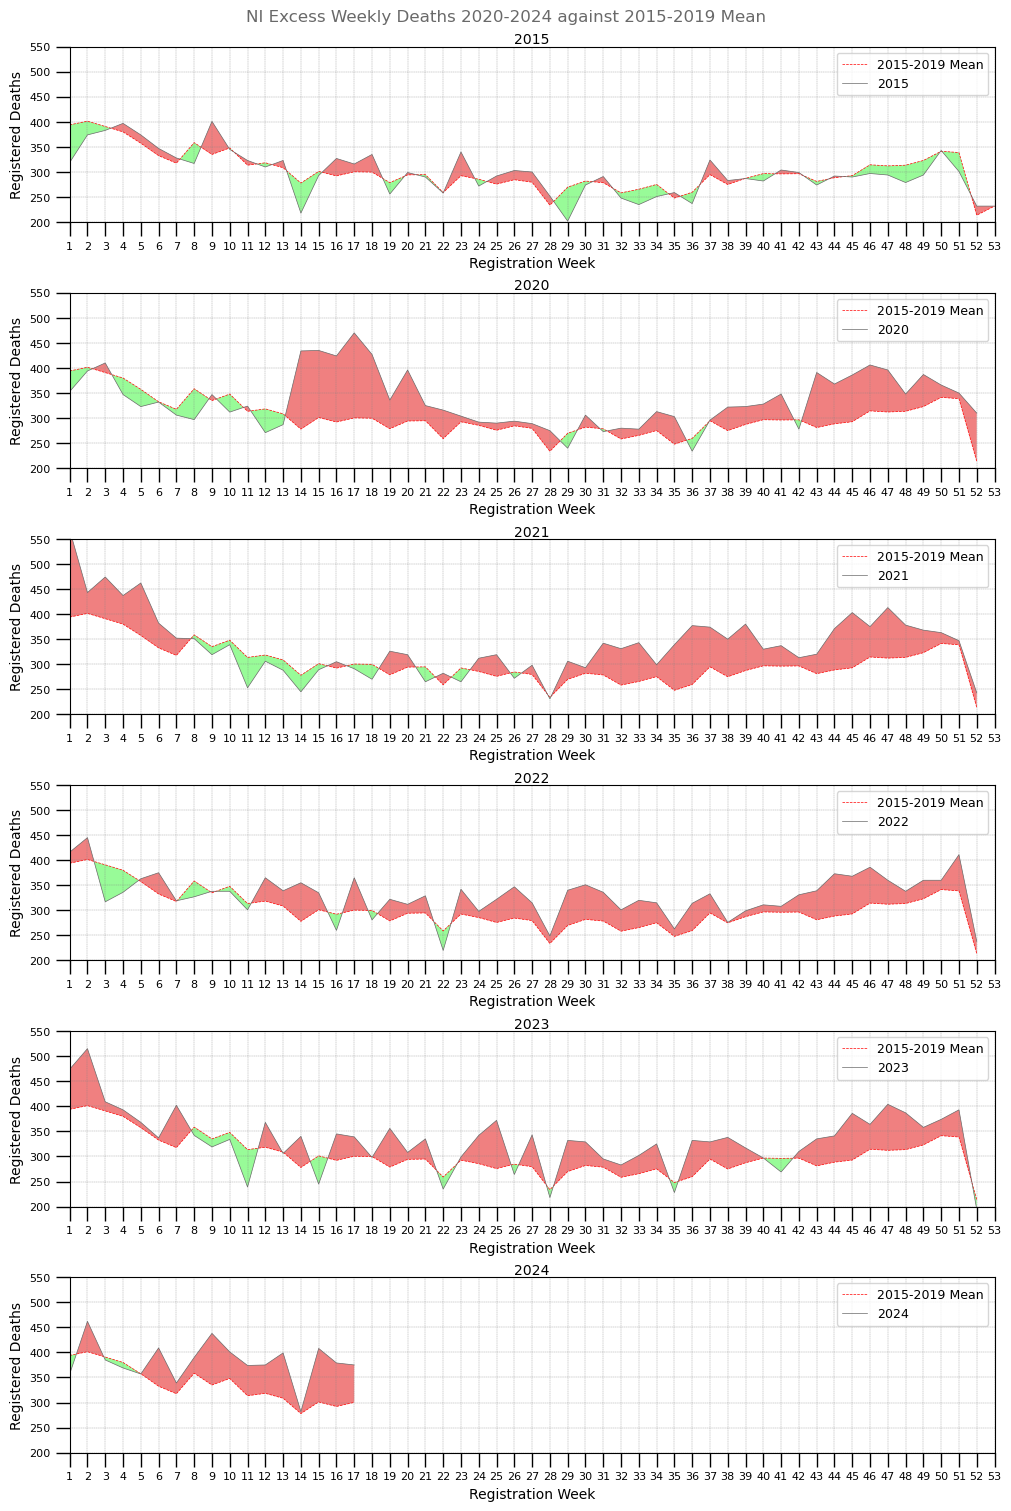

In [61]:
#Let's derive our plot from here - https://matplotlib.org/stable/gallery/showcase/anatomy.html
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

def get_weeks_with_values(df, year):
    if year == "2024":
        return df.loc[0:(analysis_end_week - 1)]
    if year in ["2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]:
        return df.loc[0:51]
    return df.loc[0:52]

fig, axs = plt.subplots(6, 1, constrained_layout=True, figsize=(10,15))

fig.suptitle('NI Excess Weekly Deaths 2020-2024 against 2015-2019 Mean', color='dimgrey')

years_to_compare = ['2015', '2020', '2021', '2022', '2023', '2024']
index=0

for year in years_to_compare:
    
    axs[index].set_title(f"{year}", fontsize=10, verticalalignment='top', color='black')

    x = get_weeks_with_values(all_weekly_deaths_df_copy, year)['Registration_Week'].astype(int)
    y1 = get_weeks_with_values(all_weekly_deaths_df_copy, year)['2015_to_2019_Mean'].astype(float)
    y2 = get_weeks_with_values(all_weekly_deaths_df_copy, year)[f'{year}'].astype(int)
    
    axs[index].set_xlim(1, 53)
    axs[index].set_ylim(200, 550)
    
    axs[index].grid(linestyle="--", linewidth=0.25, color='.5', zorder=-10)

    axs[index].plot(x, y1, color='red', lw=0.5, label="2015-2019 Mean", linestyle="--")
    axs[index].plot(x, y2, color='dimgrey', lw=0.5, label=f'{year}')

    axs[index].fill_between(x, y1, y2, where=y2 >= y1, facecolor='lightcoral', interpolate=True)
    axs[index].fill_between(x, y1, y2, where=y2 <= y1, facecolor='palegreen', interpolate=True)

    axs[index].set_xlabel("Registration Week", fontsize=10)
    axs[index].set_ylabel("Registered Deaths", fontsize=10)
    
    axs[index].xaxis.set_major_locator(MultipleLocator(1))

    axs[index].tick_params(which='major', width=1.0, length=10, labelsize=8)
    axs[index].tick_params(which='minor', width=1.0, length=5, labelsize=8,labelcolor='0.25')
    
    axs[index].legend(loc="upper right", fontsize=9)
    
    index+=1

## Weekly Comparison Against Previous Years

In [63]:
import math

def get_column_value(df, week, column):
    return df.loc[df['Registration_Week'] == week, column].values[0]

def is_higher_or_lower(value):
    if value < 0:
        return "lower than"
    else:
        if value > 0:
            return "higher than"
        else:
            return "(the same as)"

def calculate_percentage_change(first_value, second_value):
    real_difference = (second_value - first_value)

    if first_value !=0:
        percentage = round((real_difference / first_value) * 100, 1)
    else:
        percentage = 0
    return percentage

In [64]:
# Define a list of years to compare against
comparison_years = ['2023','2022', '2021', '2020',  '2015_to_2019_Mean']
this_week_2023 = get_column_value(all_weekly_deaths_df, analysis_end_week, '2024')
# Initialize a dictionary to store the results
results = {}

# Loop through each year and calculate the percentage change compared to this_week_2023
for year in comparison_years:
    weekly_deaths = get_column_value(all_weekly_deaths_df, analysis_end_week, year)
    percentage_change = calculate_percentage_change(weekly_deaths, this_week_2023)
    results[f'this_week_{year}_vs_2024'] = percentage_change

# Store the results in a list of tuples for easier iteration
result_tuples = [
    ('2023', results['this_week_2023_vs_2024']),
    ('2022', results['this_week_2022_vs_2024']),
    ('2021', results['this_week_2021_vs_2024']),
    ('2020', results['this_week_2020_vs_2024']),
    ('2015-2019 average', results['this_week_2015_to_2019_Mean_vs_2024'])
]

print(f'Registration Week {analysis_end_week} in 2024 had {this_week_2023} registered deaths which is:')

# Iterate through the results and print them out
for year, percentage_change in result_tuples:
    percentage_change_abs = abs(percentage_change)
    comparison = is_higher_or_lower(percentage_change)
    print(f' * {percentage_change_abs}% {comparison} week {analysis_end_week} in {year}')


Registration Week 17 in 2024 had 375 registered deaths which is:
 * 10.6% higher than week 17 in 2023
 * 2.7% higher than week 17 in 2022
 * 28.9% higher than week 17 in 2021
 * 20.2% lower than week 17 in 2020
 * 24.8% higher than week 17 in 2015-2019 average


In [71]:
year_range = range(2015, 2025)
for year in year_range:
    print(year)

2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


In [89]:
all_weekly_deaths_df[['Registration_Week','2015_to_2019_SD', '2016_to_2020_SD',  '2017_to_2021_SD', '2018_to_2022_SD', '2016_to_2019_and_2021_SD']]

,Registration_Week,2015_to_2019_SD,2016_to_2020_SD,2017_to_2021_SD,2018_to_2022_SD,2016_to_2019_and_2021_SD
0,1,51.516987,40.127297,86.184685,86.143485,75.608862
1,2,54.743036,52.941477,43.373955,44.252684,54.806022
2,3,50.454930,50.854695,58.590102,74.140407,62.024189
3,4,35.721142,36.755952,45.615787,50.849779,44.000000
4,5,54.035174,54.924494,70.290113,70.545730,72.104091
5,6,17.700282,15.820872,24.114311,27.012960,28.465769
6,7,57.778024,57.625515,21.730163,23.786551,59.818893
7,8,39.778135,45.588376,26.340084,26.111300,33.261088
8,9,42.071368,23.899791,19.603571,16.071714,20.218803
9,10,28.142495,32.546889,27.446311,27.097970,28.428859


In [80]:
filtered_df = all_weekly_deaths_df[all_weekly_deaths_df['Registration_Week'] == 45]

filtered_df[["Registration_Week", "2015_to_2019_Mean", "2020", "2021", "2022", "2023", "2015_to_2019_SD"]]

,Registration_Week,2015_to_2019_Mean,2020,2021,2022,2023,2015_to_2019_SD
44,45,292.8,386,403,368,386,2.774887


## Weekly Deaths Z-Score for 2015-2023 against 2015-2019 Average

In [72]:
year_range = range(2015, 2025)
year_zscore_column_name_suffix = '_zscore_against_2015_to_2019_Mean'

for year in year_range:
    all_weekly_deaths_df[f"{year}{year_zscore_column_name_suffix}"] = \
    (all_weekly_deaths_df[str(year)] - all_weekly_deaths_df["2015_to_2019_Mean"]) / all_weekly_deaths_df["2015_to_2019_SD"]

debug(all_weekly_deaths_df)

# 2020 - 2023 zscore against mean for week 44 is way off.

,Registration_Week,2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2015_zscore_against_2015_to_2019_Mean,2016_zscore_against_2015_to_2019_Mean,2017_zscore_against_2015_to_2019_Mean,2018_zscore_against_2015_to_2019_Mean,2019_zscore_against_2015_to_2019_Mean,2020_zscore_against_2015_to_2019_Mean,2021_zscore_against_2015_to_2019_Mean,2022_zscore_against_2015_to_2019_Mean,2023_zscore_against_2015_to_2019_Mean,2024_zscore_against_2015_to_2019_Mean
0,1,319,424,415,447,365,353,568,416,474,...,-1.45583,0.582332,0.407633,1.028787,-0.562921,-0.795854,3.377527,0.427044,1.552886,-0.71821
1,2,374,348,434,481,370,394,443,445,515,...,-0.50052,-0.975467,0.59551,1.454066,-0.573589,-0.135177,0.759914,0.796448,2.07515,1.10699
2,3,383,372,397,470,332,410,474,317,409,...,-0.154593,-0.37261,0.122882,1.569718,-1.165397,0.380538,1.648996,-1.462692,0.360718,-0.114954
3,4,397,355,387,426,335,347,437,336,393,...,0.475909,-0.699866,0.195962,1.287753,-1.259758,-0.923823,1.595694,-1.231764,0.36393,-0.307941
4,5,374,314,371,432,296,323,462,363,368,...,0.307207,-0.803181,0.251688,1.380582,-1.136297,-0.636622,1.935776,0.103636,0.196169,-0.007403
5,6,347,310,336,351,319,332,382,375,337,...,0.813546,-1.276816,0.192087,1.039531,-0.768349,-0.033898,2.790916,2.395442,0.248584,4.316315
6,7,328,217,337,364,342,306,352,319,402,...,0.179999,-1.741146,0.335768,0.803074,0.422306,-0.200768,0.595382,0.024231,1.460763,0.370383
7,8,317,422,351,366,337,297,351,327,342,...,-1.045801,1.59384,-0.19106,0.186032,-0.543012,-1.548589,-0.19106,-0.794406,-0.417315,0.789378
8,9,401,298,352,314,310,347,319,338,319,...,1.568763,-0.879458,0.404075,-0.499152,-0.594228,0.28523,-0.380306,0.071307,-0.380306,2.448221
9,10,345,309,357,387,342,312,339,338,334,...,-0.1066,-1.385805,0.319801,1.385805,-0.213201,-1.279204,-0.319801,-0.355335,-0.497468,1.883273


In [73]:
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

fig = make_subplots(specs=[[{"secondary_y": False}]])

for year in years:
    fig.add_trace(
        go.Scatter(x=all_weekly_deaths_df['Registration_Week'], 
                   y=all_weekly_deaths_df[f'{year}_zscore_against_2015_to_2019_Mean'].loc[0:(analysis_end_week - 1)] if year == "2024" else all_weekly_deaths_df[f'{year}_zscore_against_2015_to_2019_Mean'], 
                   name=f"{year} Z-Score"),
        secondary_y=False,)

fig.add_hrect(y0=2, y1=10, annotation_text="Statistically significant", annotation_position="top right", annotation_font_size=11, annotation_font_color="Black", fillcolor="red", opacity=0.25, line_width=0)

annotations = [
    {'x': '29', 'y': 6.5, 'text': '2022 Peak - Week Ending 31st July'},
    {'x': '34', 'y': 7.7, 'text': '2021 Peak - Week Ending 5th September'},
    {'x': '14', 'y': 7.7, 'text': '2020 Peak - Week ending 12th April'},
    {'x': '1', 'y': 2.38, 'text': 'Week Ending 13th January 2023'},
    {'x': '24', 'y': 7.2, 'text': '2023 Peak - Week Ending 16th June'},
]

for annotation in annotations:
    fig.add_annotation(
        x=annotation['x'], 
        y=annotation['y'], 
        xref="x", 
        yref="y", 
        text=annotation['text'], 
        showarrow=True, 
        font=dict(
            family="Arial",
            size=11,
            color="#020202"),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=30,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ddd9d8 ",
        opacity=0.8)

fig.update_layout(
    height=800,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    title_text="NI Weekly Deaths 215-2024 YTD by Date of Registration: Z-Scores using the 2015-2019 mean.",
    xaxis_title="Week",
    yaxis_title="Z-Score",
    xaxis_type='category'
)

fig.show()